In [28]:
# importing libraries
import cv2
import torch
import torchvision
from PIL import Image
import numpy as np
import copy
from google.colab.patches import cv2_imshow

In [35]:

width = 640
height = 360

device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')

# detection_model = torchvision.models.detection.fasterrcnn_resnet50_fpn(pretrained=True)
detection_model = torchvision.models.detection.ssdlite320_mobilenet_v3_large(pretrained=True)

detection_model.eval()
detection_model = detection_model.to(device)




/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=SSDLite320_MobileNet_V3_Large_Weights.COCO_V1`. You can also use `weights=SSDLite320_MobileNet_V3_Large_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [30]:
img = Image.open('sample_data/cars.jpg') 
img = img.resize((width, height))
img = img.convert('RGB')
img = np.array(img)
raw = copy.deepcopy(img)
img = img.transpose(2, 0, 1)
img = torch.from_numpy(img).float()/255
img = img.unsqueeze(0)
img = img.to(device)
print(img.shape)

torch.Size([1, 3, 360, 640])


In [36]:
%%timeit
pred = detection_model(img)


35.7 ms ± 5.05 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [32]:
# Get bounding boxes
boxes = pred[0]['boxes']
# Get labels
labels = pred[0]['labels']
# Get scores
scores = pred[0]['scores']

373 180 517 230
117 167 311 247


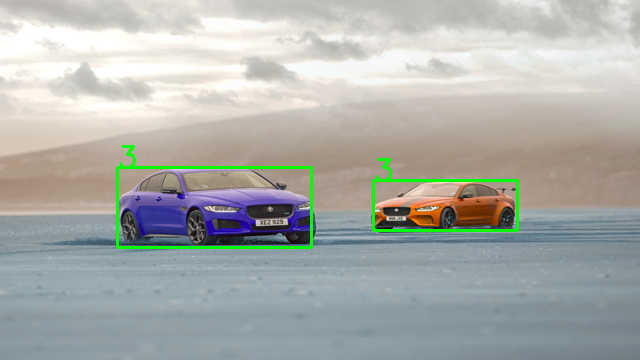

In [33]:
for box, label, score in zip(boxes, labels, scores):
    if score > 0.5:
        # Transform to original image
        x1, y1, x2, y2 = box
        x1 = int(x1.item())
        y1 = int(y1.item())
        x2 = int(x2.item())
        y2 = int(y2.item())
        label = str(label.item())
        # Draw box
        print(x1, y1, x2, y2)
        cv2.rectangle(raw, (x1, y1), (x2, y2), (0, 255, 0), 2)
        # Draw label
        cv2.putText(raw, label, (x1, y1), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)


# show the output frame
cv2_imshow(raw)
